1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

%matplotlib inline

In [8]:
def f(a):
    x=a[0]
    y=a[1]
    t1=(4-2.1*(x**2)+(x**4)/(3))*x**2
    t2=x*y
    t3=((4*y**2)-4)*y**2
    return t1+t2+t3
    
print("Initial guess (-1,1)")
sol=optimize.minimize(f, [-1,1], args=(), method='Nelder-Mead',bounds=[[-2,2],[-1,1]])
ind=1
for s in sol.final_simplex[0]:
    print("Sol number:",ind," with x:",s[0],"y:",s[1],"f(x,y):",f(s))
    ind+=1
    
print("Initial guess (0,0)")
sol0=optimize.minimize(f, [0,0], args=(), method='Nelder-Mead',bounds=[[-2,2],[-1,1]])
ind=1
for s in sol0.final_simplex[0]:
    print("Sol number:",ind," with x:",s[0],"y:",s[1],"f(x,y):",f(s))
    ind+=1
    

Initial guess (-1,1)
Sol number: 1  with x: -0.1271484374999992 y: 1.0 f(x,y): -0.06302899070890812
Sol number: 2  with x: -0.12714843749999916 y: 1.0 f(x,y): -0.06302899070890812
Sol number: 3  with x: -0.12724609374999918 y: 1.0 f(x,y): -0.06302895574861303
Initial guess (0,0)
Sol number: 1  with x: -0.08985145273780815 y: 0.7126653796314092 f(x,y): -1.031628452567338
Sol number: 2  with x: -0.08980805205476922 y: 0.7126717631781796 f(x,y): -1.031628446539581
Sol number: 3  with x: -0.08977994936150797 y: 0.7126308944632425 f(x,y): -1.0316284347273685


In [10]:
#step = int(1e3)
#x = np.linspace(-2, 2, step) #variables can be restricted to −2<x<2 and −1<y<1 .
#y = np.linspace(-1, 1, step)
#xg, yg = np.meshgrid(x, y)

#plt.figure(figsize=(15, 8)) #final plot
#plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1], cmap = 'rainbow')
#plt.colorbar()


#x = np.arange(-2, 2, 0.0001)
#y = np.arange(-1, 1, 0.0001)
#xx, yy = np.meshgrid(x, y)

#plt.figure(figsize=(15, 8)) #final plot
#plt.imshow(f([xx, yy]), extent=[-2, 2, -1, 1], cmap = 'rainbow')
#plt.colorbar()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

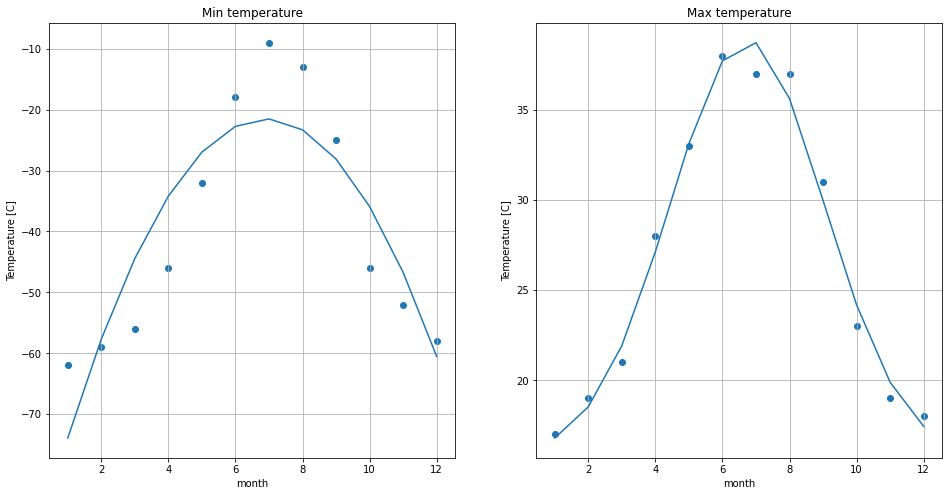

In [13]:
max_t=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_t=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
m=[1,2,3,4,5,6,7,8,9,10,11,12]

def gaus(x,mu,sig,off,scale):
    return off+scale*stats.norm.pdf(x, mu, sig)

def q(x,a,b,c,off,scale):
    return off+scale*(a*x**2+b*x+c)

par,_= optimize.curve_fit(gaus,m,max_t)
mu=par[0]
sig=par[1]
off=par[2]
scale=par[3]
y=[gaus(x,mu,sig,off,scale) for x in m]


par,_= optimize.curve_fit(q,m,min_t)
a=par[0]
b=par[1]
c=par[2]
off=par[3]
scale=par[4]
y1=[q(x,a,b,c,off,scale) for x in m]

par1,_= optimize.curve_fit(gaus,m,min_t)
mu1=par1[0]
sig1=par1[1]
off1=par1[2]
scale1=par1[3]
y2=[gaus(x,mu1,sig1,off1,scale1) for x in m]



fig, ax = plt.subplots(1,2,figsize=(16,8)) # create the figure and the axes
ax[0].scatter(m,min_t)
ax[0].set_title('Min temperature')
ax[0].set_xlabel('month')
ax[0].set_ylabel('Temperature [C]')
ax[0].plot(m, y1)
ax[0].grid()

ax[1].scatter(m,max_t)
ax[1].set_title('Max temperature')
ax[1].set_xlabel('month')
ax[1].set_ylabel('Temperature [C]')
ax[1].plot(m, y)
ax[1].grid()
plt.show()


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

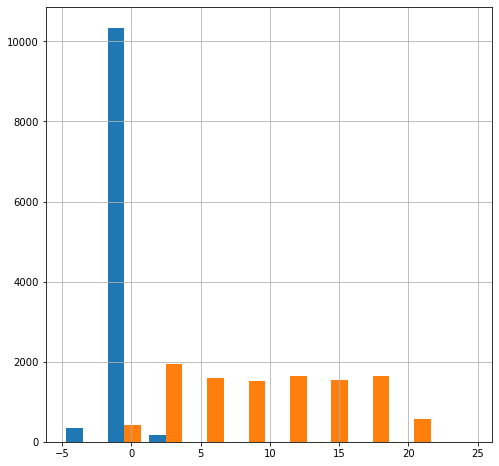

[ 0.         20.34698995 44.01136217 39.96248241 39.         40.5092582
 39.17907605 40.43513324 23.97915762  2.        ]


In [20]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

file_name= "data/residuals_261.pkl"
diz=dict(pd.read_pickle(file_name).item())
data=pd.DataFrame(diz)
res=data[data["residuals"]>-5]
fig, ax = plt.subplots(figsize=(8,8)) # create the figure and the axes
h =ax.hist(res)
ax.grid()
plt.show()

bins=h[0]


for n in bins:
    sigma=np.sqrt(n)
print(sigma)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [136]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')

# S: scrubbing data
year, temp = data.T # trick: columns to variables
data = pd.DataFrame({'year' : year,'temp' : temp,})
data=data.loc[(data["temp"] <40)]
def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c

def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*t*b+c)+d
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

Coldest year: 2009.02738 predicted temp: -0.679703976416036
Hottest year: 2010.52293 predicted temp: 19.18403913068531
Avarage temperature in Munich between 2008 and 2012 is: 9.261252084167236
The meaning of the parameter b is ....


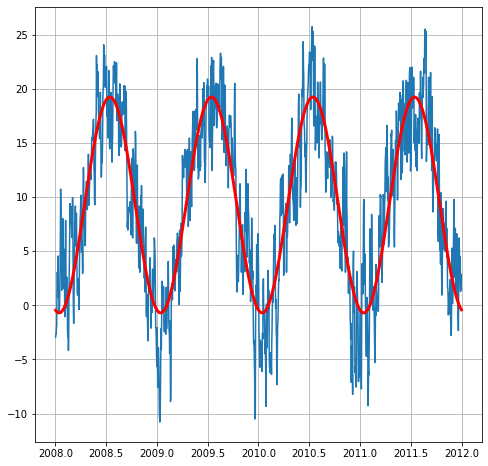

In [115]:
data_range=data.loc[(data["year"] >2008) & (data["year"] <2012)]

yr=data_range["year"]
tr=data_range["temp"]
cold_y= data_range["year"][4748+data_range["temp"].argmin()]
hot_y=data_range["year"][4748+data_range["temp"].argmax()]




par,_= optimize.curve_fit(f,yr,tr)
a=par[0]
b=par[1]
c=par[2]

fit=[f(y,a,b,c) for y in yr]

print("Coldest year:",cold_y,"predicted temp:",f(cold_y,a,b,c))
print("Hottest year:",hot_y,"predicted temp:", f(hot_y,a,b,c))

avg_temp=np.mean(tr)
print("Avarage temperature in Munich between 2008 and 2012 is:",avg_temp)
print("The meaning of the parameter b is ....")

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(yr,tr)
ax.plot(yr,fit,linewidth=3,color='red')
ax.grid()
plt.show()

RSS is: 18669.225430564933
Avarage temperature in Munich between 2008 and 2012 is: 9.261252084167236
The meaning of the parameter b is ....


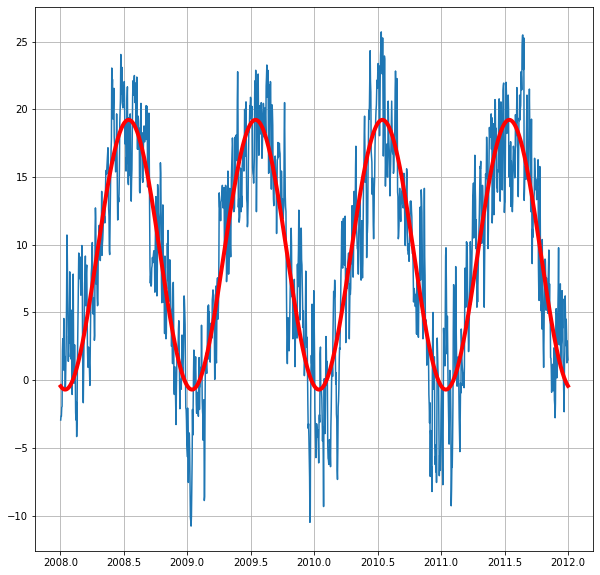

In [132]:
par,_= optimize.curve_fit(g,yr,tr)
a=par[0]
b=par[1]
c=par[2]
d=par[3]

fit1=[g(y,a,b,c,d) for y in yr]





avg_temp=np.mean(tr)
print("Avarage temperature in Munich between 2008 and 2012 is:",avg_temp)
print("The meaning of the parameter b is ....")

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(yr,tr)
ax.plot(yr,fit1,linewidth=4,color='red')
ax.grid()
plt.show()

In [135]:
RSS = np.sum((fit - tr)**2)
ndof_1=2
RSS1 = np.sum((fit1 - tr)**2)
ndof_2=3
N=len(yr)
print("RSS (f(x)) is:",RSS)
print("RSS1 (g(x)) is:",RSS1)
print("Fisher F-test")
result = Ftest(RSS, RSS1, ndof_1, ndof_2, N, verbose=True)

RSS (f(x)) is: 18669.515394578368
RSS1 (g(x)) is: 18669.225430564933
Fisher F-test
CL: 0.880 , additional parameter necessary: NO
